In [1]:
import sys
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')
from __init__ import *
from __init__jupyterlab import *

import fbpca

import snmcseq_utils

In [2]:
output_figures = '/cndd2/fangming/projects/miniatlas/results/figures/{}.pdf'

In [3]:
f = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/10x_cells_v2_hvfeatures.gene'
hvgenes_1 = snmcseq_utils.import_single_textcol(f)
f = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/snmcseq_gene_hvfeatures.gene'
hvgenes_2 = snmcseq_utils.import_single_textcol(f)
f = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/snatac_gene_hvfeatures.gene'
hvgenes_3 = snmcseq_utils.import_single_textcol(f)

In [4]:
data_dir = '/cndd2/fangming/miniatlas/cluster_level'
f1 = os.path.join(data_dir, 'gene_features_10x_cells_v2_round3.tsv')
df1 = pd.read_csv(f1, sep='\t', index_col=0)
print(df1.shape)
df1.head()

f2 = os.path.join(data_dir, 'gene_features_mch_round3.tsv')
df2 = pd.read_csv(f2, sep='\t', index_col=0)
print(df2.shape)
df2.head()

f3 = os.path.join(data_dir, 'gene_features_snatac_gene_round3.tsv')
df3 = pd.read_csv(f3, sep='\t', index_col=0)
print(df3.shape)
df3.head()

(31053, 56)
(55487, 56)
(53278, 56)


,1-1-1,1-2-1,1-2-2,10-1-1,2-1-1,2-1-2,2-2-1,2-2-2,2-2-3,2-2-4,...,7-2-1,7-2-2,8-1-1,8-1-2,8-2-1,8-3-1,8-3-2,9-1-1,9-2-1,9-2-2
ENSMUSG00000037552,0.912903,0.859411,0.922851,NaN,0.903494,0.927263,0.959277,0.000000,0.000000,0.000000,...,0.951797,0.484758,0.000000,0.000000,1.139388,0.000000,NaN,0.873330,0.0,1.555317
ENSMUSG00000052609,0.670633,0.751090,0.777436,NaN,0.518626,0.458614,0.454410,0.850543,0.000000,1.565743,...,0.488953,0.317214,0.757761,0.972986,0.325630,1.324593,NaN,0.595691,0.0,1.285513
ENSMUSG00000040624,0.640218,0.650914,0.674777,NaN,0.392328,0.446349,0.388189,0.476525,0.514022,0.691173,...,0.538429,0.402851,0.486458,0.921193,0.690580,0.000000,NaN,0.451891,0.0,0.698883
ENSMUSG00000111491,0.854395,0.968977,0.956791,NaN,0.802659,0.646862,0.815039,0.000000,1.337431,0.000000,...,0.737645,0.804998,1.299061,0.000000,0.000000,0.000000,NaN,1.020306,0.0,0.000000
ENSMUSG00000014782,0.741589,0.832533,0.884309,NaN,0.532043,0.421462,0.506504,0.000000,1.351295,0.000000,...,0.899070,0.577815,0.000000,0.000000,0.000000,0.000000,NaN,0.856733,0.0,0.000000


In [5]:
# df1 = df1.reindex(hvgenes_1)
# df2 = df2.reindex(hvgenes_2)
# df3 = df3.reindex(hvgenes_3)
print(df1.shape, df2.shape, df3.shape)

(31053, 56) (55487, 56) (53278, 56)


In [6]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/cluster_annotation_scf_round3.tsv'
df_annot = pd.read_csv(f, sep='\t')
print(df_annot.shape)
df_annot = df_annot.set_index('cluster')['annot']
df_annot.head()

(56, 3)


cluster
1-1-1       L4/5 IT (1)
1-2-1       L4/5 IT (2)
1-2-2       L4/5 IT (3)
2-1-1    L6 CT Cpa6 (1)
2-1-2    L6 CT Cpa6 (2)
Name: annot, dtype: object

In [30]:
clsts_manual_order = collections.OrderedDict({
      '4-1-1': 'L2/3 IT ',
      '4-1-2': 'L2/3 IT ',
      '4-2-1': 'L2/3 IT ',
      '4-2-2': 'L2/3 IT ',
      '4-2-3': 'L2/3 IT ',
      '1-1-1': 'L5 IT Rspo1_1',
      '1-2-1': 'L5 IT Rspo2_1',
      '1-2-2': 'L5 IT Tcap_1',
      '3-1-2': 'L5 IT S100b',
      '3-2-1': 'L5 IT S100b',
      '3-2-2': 'L5 IT S100b',
      '3-1-1': 'L6 IT_2',
      '3-3-1': 'L6 IT Car3',
    
      '9-1-1': 'L5 ET_1',
      '9-2-1': 'L5 ET_2',
      '9-2-2': 'L5 ET_3',
    
      '2-1-1': 'L6 CT Cpa6',
      '2-1-2': 'L6 CT Cpa6',
      '2-2-1': 'L6 CT Cpa6',
      '2-2-2': 'L6 CT Cpa6',
      '2-2-3': 'L6 CT Gpr139',
      '2-2-4': 'L6 CT Cpa6',
      '2-3-1': 'L6 CT Nxph2 Pou3f2',
      '2-3-2': 'L6 CT Nxph2 Pou3f2',
      '2-3-3': 'L6 CT Nxph2 Kit',
    
      '8-1-1': 'L6b Shisa6_1',
      '8-1-2': 'L6b Shisa6_2_2',
      '8-2-1': 'L6b Ror1',
      '8-3-1': 'L6b Kcnip1_2',
      '8-3-2': 'L6b Kcnip1_2',
    
      '7-1-1': 'L6 NP Trh_1',
      '7-1-2': 'L5 NP Trh',
      '7-2-1': 'L5 NP Slc17a8',
      '7-2-2': 'L5 NP Slc17a8',
    
      '5-4-1': 'Pvalb Gabrg1',
      '5-1-1': 'Pvalb Reln',
      '5-1-2': 'Pvalb Calb1_1',
      '5-5-1': 'Pvalb Vipr2',
    
      '5-2-1': 'Sst Myh8_2',
      '5-2-2': 'Sst Crhr2_1',
      '5-2-3': 'Sst Crhr2_2',
      '5-3-1': 'Sst Calb2',
      '5-3-2': 'Sst Hspe_3',
      '10-1-1': 'Sst Chodl',
    
      '6-1-1': 'Vip Chat',
      '6-1-2': 'Vip Crispld2',
      '6-3-1': 'Vip Gpc3',
      '6-3-2': 'Vip Htr1f_1',
      '6-5-3': 'Sncg Npy2r',
      '6-3-3': 'Vip Igfbp6',
      '6-5-2': 'Vip Serpinf1_2',
      '6-5-1': 'Sncg Col14a1',
    
      '6-6-1': 'Lamp5 Lhx6',
      '6-2-1': 'Lamp5 Slc35d3',
      '6-4-1': 'Lamp5 Pdlim5',
      '6-4-2': 'Lamp5 Pax6',
    
})

clsts_uniq = np.array(list(clsts_manual_order.keys()))
clsts_uniq

array(['4-1-1', '4-1-2', '4-2-1', '4-2-2', '4-2-3', '1-1-1', '1-2-1',
       '1-2-2', '3-1-2', '3-2-1', '3-2-2', '3-1-1', '3-3-1', '9-1-1',
       '9-2-1', '9-2-2', '2-1-1', '2-1-2', '2-2-1', '2-2-2', '2-2-3',
       '2-2-4', '2-3-1', '2-3-2', '2-3-3', '8-1-1', '8-1-2', '8-2-1',
       '8-3-1', '8-3-2', '7-1-1', '7-1-2', '7-2-1', '7-2-2', '5-4-1',
       '5-1-1', '5-1-2', '5-5-1', '5-2-1', '5-2-2', '5-2-3', '5-3-1',
       '5-3-2', '10-1-1', '6-1-1', '6-1-2', '6-3-1', '6-3-2', '6-5-3',
       '6-3-3', '6-5-2', '6-5-1', '6-6-1', '6-2-1', '6-4-1', '6-4-2'],
      dtype='<U6')

In [7]:
# remove NAs, simple way
dfs = [df1, df2, df3]
clusters = df1.columns.values
assert np.all(clusters==df2.columns.values)
assert np.all(clusters==df3.columns.values)

for i in range(3):
    x = dfs[i].T
    x = x.fillna(x.mean())
    dfs[i] = x.T.dropna()
    

In [46]:
reorder = snmcseq_utils.get_index_from_array(clusters, clsts_uniq)
# clusters[reorder]
fout = '/cndd2/fangming/projects/miniatlas/results/dendro_new_order.csv'
new_order = (np.arange(56)+1)[reorder]
np.savetxt(fout, new_order, delimiter=',')

fout = '/cndd2/fangming/projects/miniatlas/results/dendro_new_order_labels.csv'
new_order_labels = df_annot.loc[clsts_uniq]
print(new_order_labels)
new_order_labels.to_csv(fout, header=False, index=False)

cluster
4-1-1                L2/3 IT (1)
4-1-2                L2/3 IT (2)
4-2-1                L2/3 IT (3)
4-2-2                L2/3 IT (4)
4-2-3                L2/3 IT (5)
1-1-1                L4/5 IT (1)
1-2-1                L4/5 IT (2)
1-2-2                L4/5 IT (3)
3-1-2                  L5 IT (1)
3-2-1                  L5 IT (2)
3-2-2                  L5 IT (3)
3-1-1                      L6 IT
3-3-1                 L6 IT Car3
9-1-1                  L5 PT (1)
9-2-1                  L5 PT (2)
9-2-2                  L5 PT (3)
2-1-1             L6 CT Cpa6 (1)
2-1-2             L6 CT Cpa6 (2)
2-2-1             L6 CT Cpa6 (3)
2-2-2             L6 CT Cpa6 (4)
2-2-3               L6 CT Gpr139
2-2-4             L6 CT Cpa6 (5)
2-3-1     L6 CT Nxph2 Pou3f2 (1)
2-3-2     L6 CT Nxph2 Pou3f2 (2)
2-3-3            L6 CT Nxph2 Kit
8-1-1             L6b Shisa6 (1)
8-1-2             L6b Shisa6 (2)
8-2-1                   L6b Ror1
8-3-1             L6b Kcnip1 (2)
8-3-2             L6b Kcnip1 (1)
7-

In [8]:
specs2 = clusters[(~df2.isnull()).sum() == 0]
df_annot.reindex(specs2)

cluster
2-2-3      L6 CT Gpr139
2-2-4    L6 CT Cpa6 (5)
8-3-2    L6b Kcnip1 (1)
Name: annot, dtype: object

In [9]:
specs3 = clusters[(~df3.isnull()).sum() == 0]
df_annot.reindex(specs3)

cluster
10-1-1         Sst Chodl
3-2-2          L5 IT (3)
8-3-2     L6b Kcnip1 (1)
Name: annot, dtype: object

In [38]:
# compute PCs
# compute tree
from scipy.cluster import hierarchy as sch

pcs = ['']*3
zs = ['']*3

for i, df in enumerate(dfs):
    U, s, Vt = fbpca.pca(df.values.T, k=20)
    pc = U.dot(np.diag(s))
    z = sch.linkage(pc, method='ward')
    pcs[i] = pc
    zs[i] = z
    
    fout = '/cndd2/fangming/projects/miniatlas/results/z{}.csv'.format(i+1)
    znew = z.copy()
    znew = znew[:, :3]
    znew[:, :3] += 1
    np.savetxt(fout, znew, delimiter=',')
    

In [11]:
def labels_from_dendro(g):
    return clusters[g['leaves']] + '_' + df_annot.reindex(clusters[g['leaves']]).values

def labels_from_dendro2(g):
    return df_annot.reindex(clusters[g['leaves']]).values

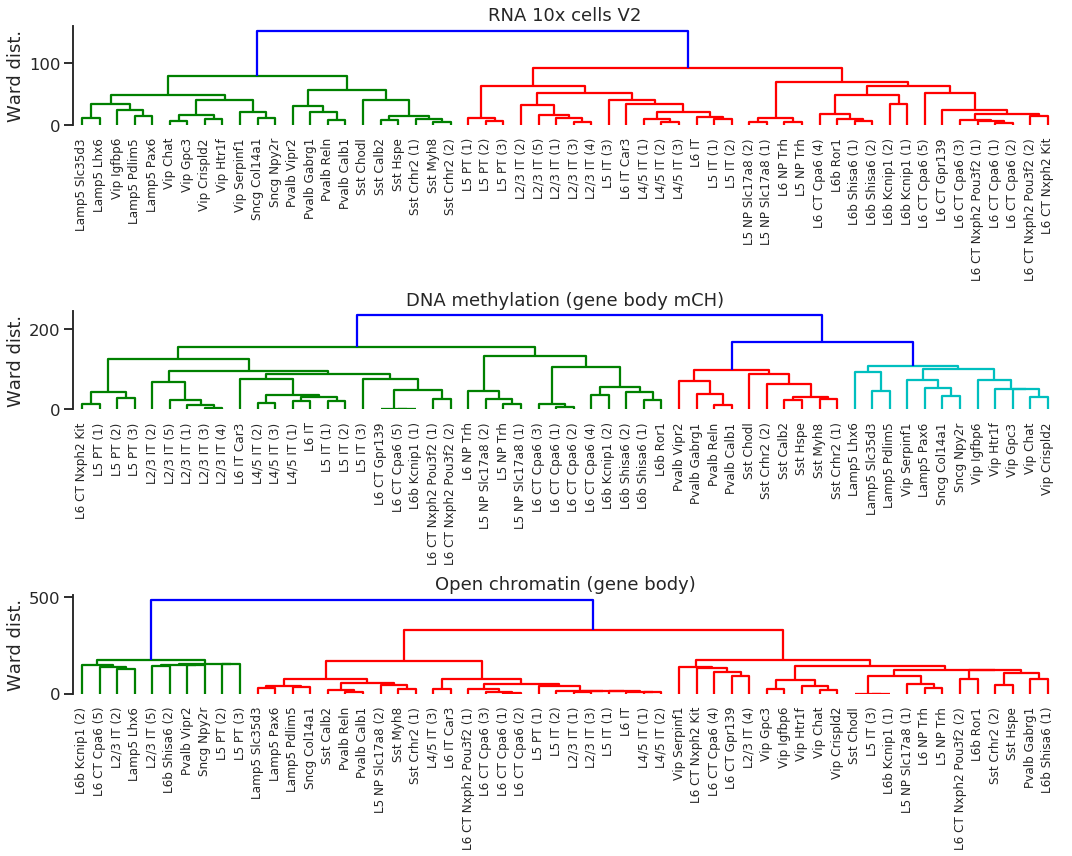

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(1*15, 3*4))
titles = ['RNA 10x cells V2', 'DNA methylation (gene body mCH)', 'Open chromatin (gene body)']
for ax, z, title in zip(axs, zs, titles):
    g = sch.dendrogram(z, ax=ax)
    ax.grid(False)
    ax.set_xticklabels(labels_from_dendro2(g), fontsize=12)
    ax.set_title(title)
    ax.set_ylabel('Ward dist.')
    sns.despine(ax=ax, bottom=True)
#     break
fig.tight_layout()
snmcseq_utils.savefig(fig, output_figures.format('dendrogram_mockup'))
# plt.show()

In [13]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/miniatlas_fig4_scf_clusterings.tsv'
df_clst = pd.read_csv(f, sep='\t')
print(df_clst.shape)
df_clst.head()

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(408885, 11)


,sample,joint_embedding_x,joint_embedding_y,modality,modality_name,single_modality_cluster,single_modality_annot,joint_cluster_round1,joint_cluster_round2,joint_cluster_round3,joint_cluster_round4
0,snmcseq_gene_2C_M_0,0.471629,-3.134735,snmcseq_gene,DNA methylation,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb_Rorb-Tenm2,1,1-1,1-1-1,1-1-1-1
1,snmcseq_gene_2C_M_1,-2.414973,-12.098081,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-2,4-2-1,4-2-1-1
2,snmcseq_gene_2C_M_100,-1.446751,-12.051894,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-1,4-1-1,4-1-1-1
3,snmcseq_gene_2C_M_1000,-1.901734,-13.660591,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-2,4-2-1,4-2-1-1
4,snmcseq_gene_2C_M_1001,-0.981086,-11.936621,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-1,4-1-1,4-1-1-1


In [14]:
_x = df_clst.groupby(['modality', 'joint_cluster_round3']).size().unstack().fillna(0).astype(int)
_x = _x.loc['snatac_gene'].sort_values()
_x.index = df_annot.reindex(_x.index)

In [15]:
_x

annot
L6b Kcnip1 (1)                0
Sst Chodl                     0
L5 IT (3)                     0
L2/3 IT (2)                   2
L6b Kcnip1 (2)                2
L5 PT (2)                     4
L5 PT (3)                     4
Sncg Npy2r                    6
L6 CT Cpa6 (5)                6
Lamp5 Lhx6                    8
L6b Shisa6 (2)               11
Vip Serpinf1                 13
L2/3 IT (5)                  17
Pvalb Vipr2                  19
L6 CT Cpa6 (4)               26
L6 CT Nxph2 Kit              36
Sst Hspe                     39
L6 CT Gpr139                 44
Pvalb Gabrg1                 55
Sst Crhr2 (2)                59
L6 CT Nxph2 Pou3f2 (2)       63
L6b Ror1                     74
Vip Igfbp6                   83
L6b Shisa6 (1)               91
L2/3 IT (4)                  93
L5 NP Trh                   117
L5 NP Slc17a8 (1)           132
Vip Gpc3                    136
Vip Htr1f                   164
L6 NP Trh                   270
Lamp5 Pdlim5                328
Sn